# Optimization Results Database
### View and compare all experiment runs

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd

print("database viewer loaded")

database viewer loaded


## Load Results from Database

In [2]:
# load all experiments
try:
    with open('results_database.json', 'r') as f:
        results = json.load(f)
    print(f"loaded {len(results)} experiment(s)")
except FileNotFoundError:
    print("no database found yet - run optimization first")
    results = []
except json.JSONDecodeError:
    print("database corrupted")
    results = []

loaded 33 experiment(s)


In [3]:
# create summary table
if results:
    data = {
        'exp #': list(range(1, len(results)+1)),
        'date': [datetime.fromisoformat(r['timestamp']).strftime('%m/%d %H:%M') for r in results],
        'f(x)': [r['f_value'] for r in results],
        'evals': [r['evaluations'] for r in results],
        'seed': [r['seed'] for r in results],
    }
    
    df = pd.DataFrame(data)
    
    # format f(x) column for scientific notation
    df['f(x)'] = df['f(x)'].apply(lambda x: f'{x:.6e}')
    
    print(df.to_string(index=False))
    
    # highlight best
    best_idx = np.argmin([r['f_value'] for r in results])
    print(f"\nbest experiment: #{best_idx+1} with f(x) = {results[best_idx]['f_value']:.12e}")
else:
    print("no experiments to display")

 exp #        date         f(x)  evals    seed
     1 11/14 23:06 4.109078e-12 100000 2024117
     2 11/14 23:07 4.109078e-12 100000 2024117
     3 11/14 23:08 9.949591e-01 100000 2024117
     4 11/14 23:09 9.949591e-01 100000      42
     5 11/14 23:13 9.949591e-01 100000      42
     6 11/14 23:22 4.255684e-14  85735      42
     7 11/14 23:23 4.255684e-14  85735      42
     8 11/14 23:24 9.223355e-14 100000 2024117
     9 11/14 23:25 9.949591e-01 100000 2024117
    10 11/14 23:25 1.362993e-06 100000 2024117
    11 11/14 23:26 2.542371e-12 100000 2024117
    12 11/14 23:28 1.989918e+00 100000 2024117
    13 11/14 23:28 1.900551e+01 100000 2024117
    14 11/14 23:29 7.551880e-15 100000 2024117
    15 11/14 23:34 3.740142e+01  60695 2024117
    16 11/14 23:36 4.037380e-05  71794 2024117
    17 11/14 23:37 1.989964e+00  70085 2024117
    18 11/14 23:38 1.989964e+00  70085 2024117
    19 11/14 23:39 1.989918e+00 100000 2024117
    20 11/14 23:39 7.551880e-15 100000 2024117
    21 11/14 

## Statistics

In [4]:
# calculate statistics
if results:
    f_vals = np.array([r['f_value'] for r in results])
    
    print("=" * 50)
    print("STATISTICS")
    print("=" * 50)
    
    print(f"\ntotal experiments: {len(results)}")
    print(f"best f(x):  {np.min(f_vals):.15e}")
    print(f"worst f(x): {np.max(f_vals):.15e}")
    print(f"mean f(x):  {np.mean(f_vals):.15e}")
    print(f"std f(x):   {np.std(f_vals):.15e}")
    
    # trend analysis
    if len(results) >= 4:
        recent = np.mean(f_vals[-3:])
        older = np.mean(f_vals[:3])
        improvement = (older - recent) / older * 100
        
        print(f"\ntrend: ", end='')
        if improvement > 0:
            print(f"improving ({improvement:.1f}% better)")
        else:
            print(f"degrading ({abs(improvement):.1f}% worse)")

STATISTICS

total experiments: 33
best f(x):  6.665856295721302e-15
worst f(x): 3.740142088041675e+01
mean f(x):  2.587867987393958e+00
std f(x):   7.486713797746527e+00

trend: improving (100.0% better)


## Visualizations

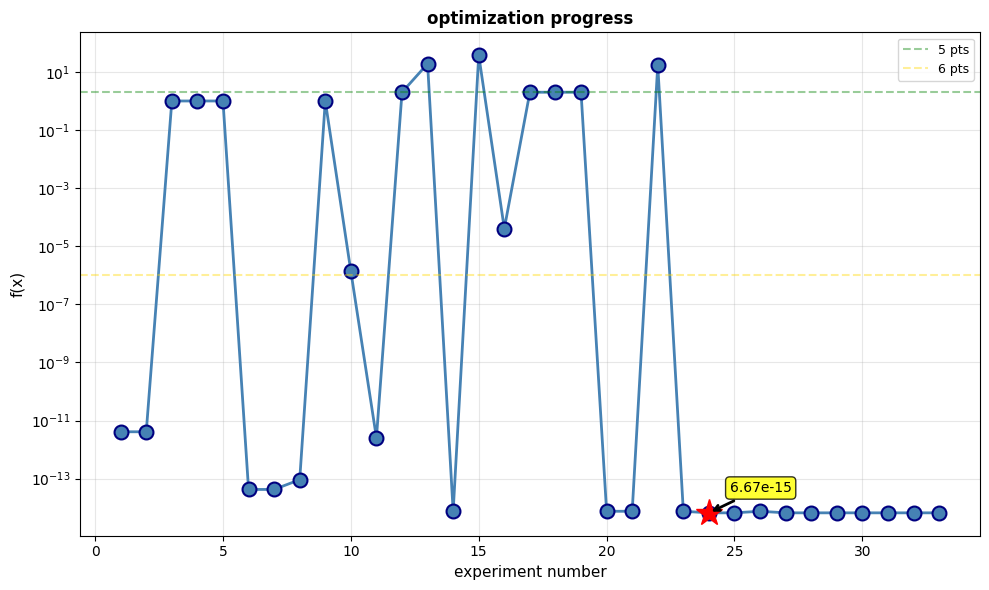


visualization saved to 'results_comparison.png'


In [5]:
# optimization progress visualization
if not results:
    print("no results to plot")
else:
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # extract data
    f_vals = [r['f_value'] for r in results]
    
    # plot f(x) progress
    ax.semilogy(range(1, len(f_vals)+1), f_vals, 'o-', linewidth=2, markersize=10, 
                 color='steelblue', markeredgecolor='navy', markeredgewidth=1.5)
    ax.set_xlabel('experiment number', fontsize=11)
    ax.set_ylabel('f(x)', fontsize=11)
    ax.set_title('optimization progress', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    # add threshold lines
    ax.axhline(y=2.0, color='green', linestyle='--', alpha=0.4, linewidth=1.5, label='5 pts')
    ax.axhline(y=1e-6, color='gold', linestyle='--', alpha=0.4, linewidth=1.5, label='6 pts')
    ax.legend(fontsize=9)
    
    # annotate best
    best_idx = np.argmin(f_vals)
    ax.plot(best_idx+1, f_vals[best_idx], 'r*', markersize=20, label='best')
    ax.annotate(f'{f_vals[best_idx]:.2e}', 
                xy=(best_idx+1, f_vals[best_idx]),
                xytext=(15, 15), textcoords='offset points',
                bbox=dict(boxstyle='round', fc='yellow', alpha=0.8),
                arrowprops=dict(arrowstyle='->', lw=2))
    
    plt.tight_layout()
    plt.savefig('results_comparison.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    print(f"\nvisualization saved to 'results_comparison.png'")

## Detailed View of Best Experiment

In [6]:
# show details of best experiment
if results:
    best_idx = np.argmin([r['f_value'] for r in results])
    best = results[best_idx]
    
    print("=" * 60)
    print(f"BEST EXPERIMENT (#{best_idx+1})")
    print("=" * 60)
    
    print(f"\ndate: {best['timestamp']}")
    print(f"f(x): {best['f_value']:.15e}")
    print(f"evaluations: {best['evaluations']:,}")
    print(f"seed: {best['seed']}")

    print(f"\nsolution vector:")
    sol = np.array(best['solution'])
    print("block 1:", sol[0:5])
    print("block 2:", sol[5:10])
    print("block 3:", sol[10:15])

BEST EXPERIMENT (#24)

date: 2025-11-15T00:30:11.986568
f(x): 6.665856295721302e-15
evaluations: 100,000
seed: 2024014

solution vector:
block 1: [1.         1.         0.99999999 1.         1.        ]
block 2: [-1.5 -1.5 -1.5 -1.5 -1.5]
block 3: [0.50000001 0.5        0.50000004 0.49999997 0.5       ]


## Export Best Result for Submission

In [7]:
# export best result in submission format
if results:
    best_idx = np.argmin([r['f_value'] for r in results])
    best = results[best_idx]
    
    print("=" * 60)
    print("BEST RESULT FOR SUBMISSION")
    print("=" * 60)
    
    sol = np.array(best['solution'])
    
    print(f"\nXopt = [")
    for i in range(0, 15, 5):
        vals = [f"{sol[j]:.10f}" for j in range(i, min(i+5, 15))]
        sep = "," if i < 10 else ""
        print(f"  {', '.join(vals)}{sep}")
    print("]")
    
    print(f"\nf(Xopt) = {best['f_value']:.15e}")
    print(f"Seed = {best['seed']}")
    print(f"\nAlgorithm: Hybrid IPOP-CMA-ES with Nelder-Mead refinement")
    
    # handle missing comment field
    comment = best.get('comment', '')
    if not comment and 'config' in best:
        config = best['config']
        comment = f"restarts={config.get('restarts', '?')}, budget_split={config.get('budget_split', '?')}, local_method={config.get('local_method', '?')}, sigma_factor={config.get('sigma_factor', '?')}"
    print(f"Configuration: {comment if comment else 'no comment available'}")

BEST RESULT FOR SUBMISSION

Xopt = [
  0.9999999985, 1.0000000000, 0.9999999940, 0.9999999999, 0.9999999991,
  -1.5000000000, -1.5000000000, -1.5000000000, -1.5000000000, -1.5000000000,
  0.5000000089, 0.5000000035, 0.5000000376, 0.4999999716, 0.5000000029
]

f(Xopt) = 6.665856295721302e-15
Seed = 2024014

Algorithm: Hybrid IPOP-CMA-ES with Nelder-Mead refinement
Configuration: restarts=5, budget_split=67%/33%, local_method=Nelder-Mead, sigma_factor=0.3
